## 1. Getting to know about the data
1. Lets have an Overview of The data
2. Data is taken from the link https://www.kaggle.com/datasets/sdolezel/black-friday
3. This dataset contains basic information about the customers and the products bought in the black friday sale

## 1.1 Importing all The important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

## 1.2 Loading the dataset

In [2]:
# Loading the data using pandas method (.read_csv)
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Getting basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
# Fetching the no of null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## We can see that Product_Category_2 and Product_Category_3 have null values so the rows can be removed or filled with different strategies . Or you can also remove the whole columns so that you dont lose the data

In [5]:
del df["Product_Category_2"]
del df["Product_Category_3"]
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


## 1.3 No of Unique values in all the columns


In [6]:
for column in df.columns:
    print("No of Unique values in ",column,":",df.columns.nunique())

No of Unique values in  User_ID : 10
No of Unique values in  Product_ID : 10
No of Unique values in  Gender : 10
No of Unique values in  Age : 10
No of Unique values in  Occupation : 10
No of Unique values in  City_Category : 10
No of Unique values in  Stay_In_Current_City_Years : 10
No of Unique values in  Marital_Status : 10
No of Unique values in  Product_Category_1 : 10
No of Unique values in  Purchase : 10


## 1.4 Gender Analysis

## 1.4.1 No of males and females in data


In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [8]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

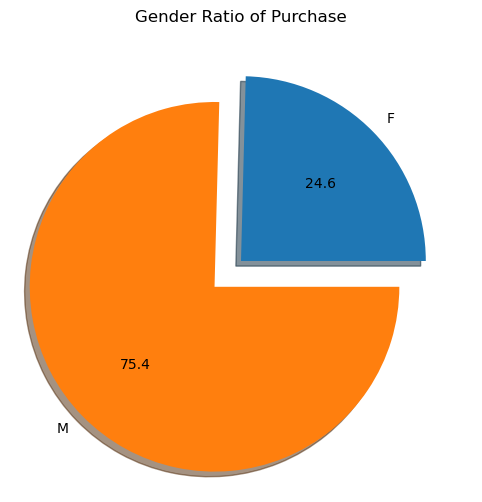

In [9]:
df.groupby("Gender").size().plot(kind="pie",autopct="%.1f",title="Gender Ratio of Purchase",shadow=True,
                                figsize=(10,6),explode=[0,0.2]);

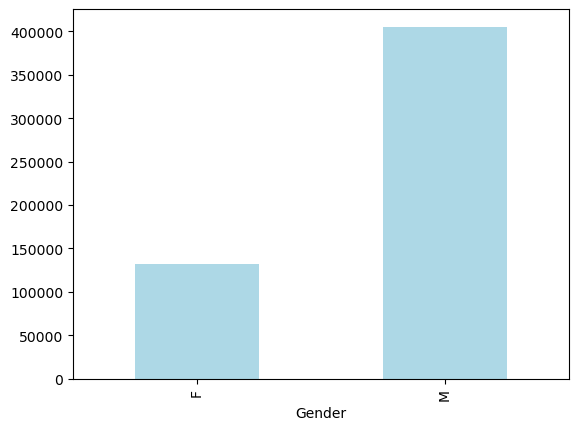

In [10]:
df.groupby("Gender").size().plot(kind="bar",color="lightblue");


## 1.4.2 Total amount spent by Male and Female

In [11]:
df.groupby("Gender").sum()["Purchase"]

C:\Users\ANIMESH\AppData\Local\Temp\ipykernel_20236\2627663225.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").sum()["Purchase"]


Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'Amount spent by Male and Female')

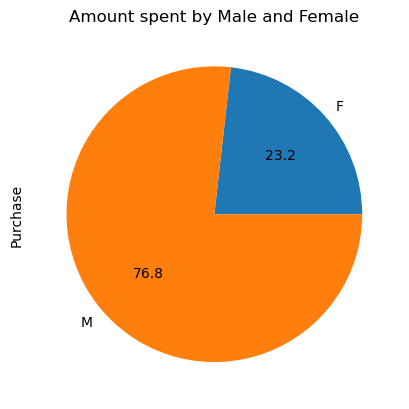

In [12]:
df.groupby("Gender").sum(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%0.1f")
plt.title("Amount spent by Male and Female")


## 1.4.3 Mean amount spent by male and female on one product

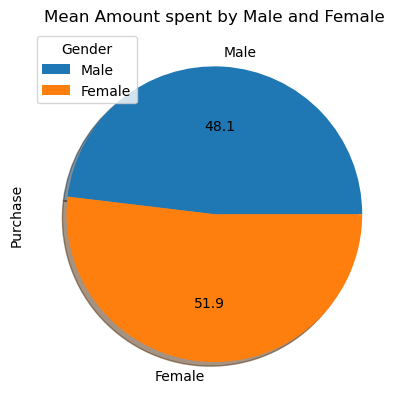

In [13]:
df.groupby("Gender").mean(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%0.1f",labels=["Male","Female"],shadow=True)
plt.title("Mean Amount spent by Male and Female")
plt.legend(title="Gender");


## 2. Age ANALYSIS

## 2.1 total purchsase done age wise

In [14]:
df.groupby("Age").size()


Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

Text(0.5, 1.0, 'Total amount spent age wise')

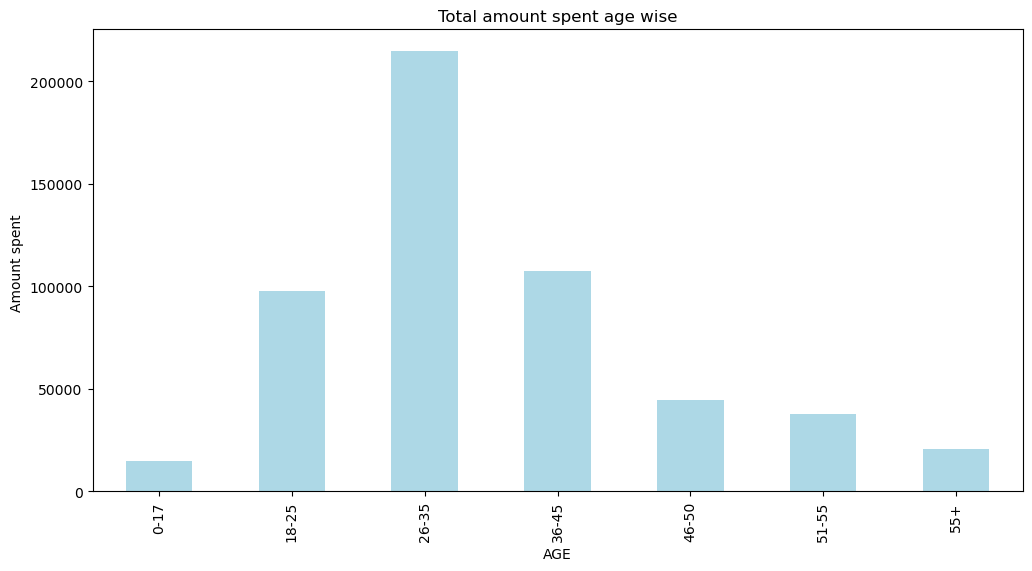

In [15]:
df.groupby("Age").size().plot(kind="bar",color="lightblue",figsize=(12,6))
plt.xlabel("AGE")
plt.ylabel("Amount spent ")
plt.title("Total amount spent age wise")

## 2.2 Total products brought age wise

In [16]:
lst=[]
for i in df["Age"].unique():
    lst.append([i,df[df["Age"]==i]["Product_ID"].nunique()])
lst    

[['0-17', 2300],
 ['55+', 2573],
 ['26-35', 3419],
 ['46-50', 3099],
 ['51-55', 2877],
 ['36-45', 3318],
 ['18-25', 3213]]

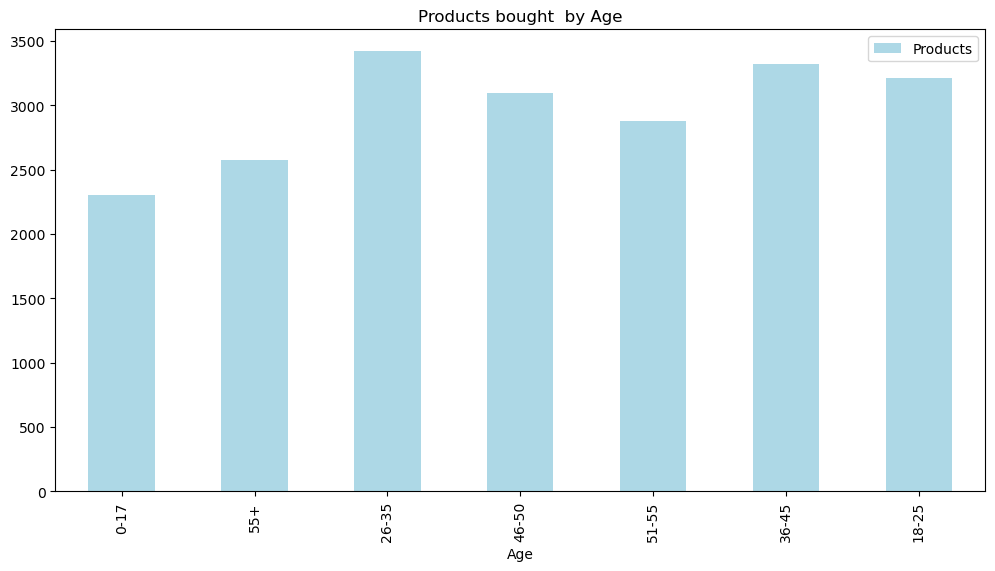

In [17]:
data = pd.DataFrame(lst,columns=["Age","Products"])
data.plot(x="Age",kind="bar",color="lightblue",label="Product",title="Products bought  by Age",figsize=(12,6),);

## 2.3 Average amount spend  by age

In [18]:
df.groupby("Age").mean(numeric_only=True)["Purchase"]

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

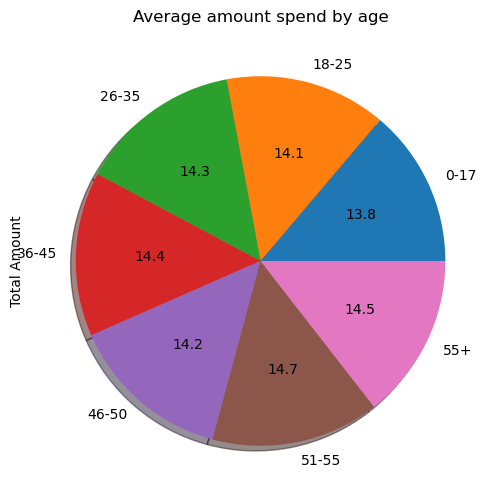

In [19]:
df.groupby("Age").mean(numeric_only=True)["Purchase"].plot(kind="pie",figsize=(12,6),title="Average amount spend by age",autopct="%0.1f",shadow=True)
plt.ylabel("Total Amount");

## 3. Stay in city 

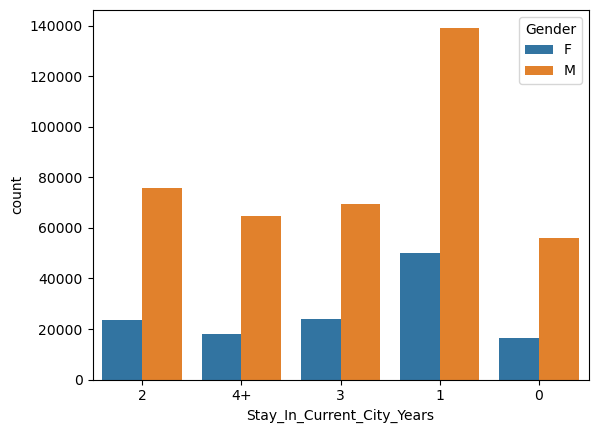

In [20]:
plt.plot(12,6)
sns.countplot(x="Stay_In_Current_City_Years",data=df,hue="Gender");

We can interpret that the males staying for 1 year in a city are spending more money

## 3.1 Stay in city VS Marital Status

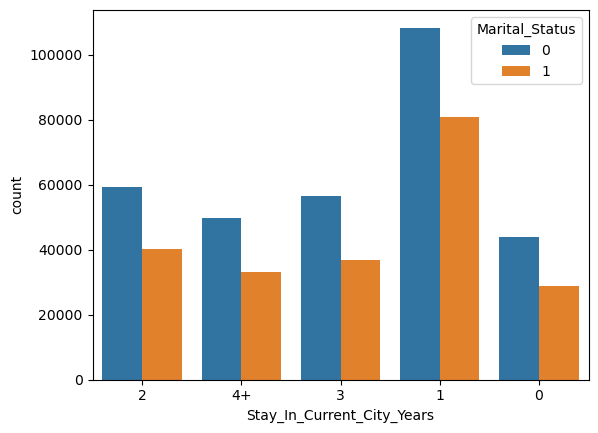

In [21]:
sns.countplot(x="Stay_In_Current_City_Years",data=df,hue="Marital_Status");

By this graph we can interpret that the unmarried people staying for 1 year has spending most of the money in black friday sale.
People staying in a city for about months does not have much spend in the sale

## 3.2  Stay in City VS City Category

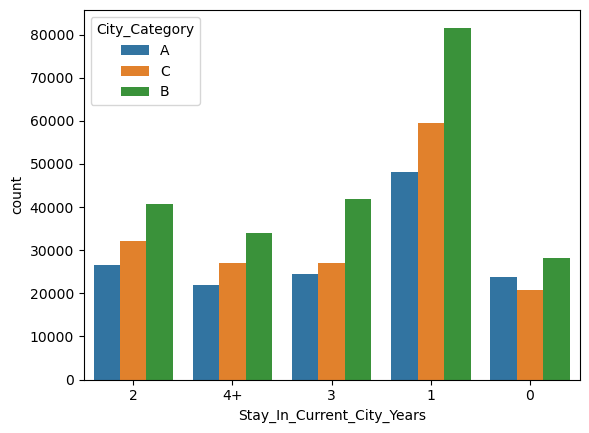

In [22]:
sns.countplot(x="Stay_In_Current_City_Years",data=df,hue="City_Category");

We can interpret that the people living in city B has most of he expenses .

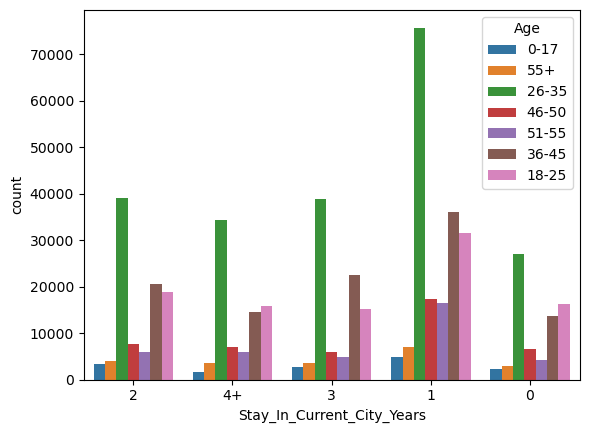

In [23]:
sns.countplot(x="Stay_In_Current_City_Years",data=df,hue="Age");

Through this graph we can get to know that the people ranging from age 26-35 have most of the expenses whereas the least is for 
0-17.

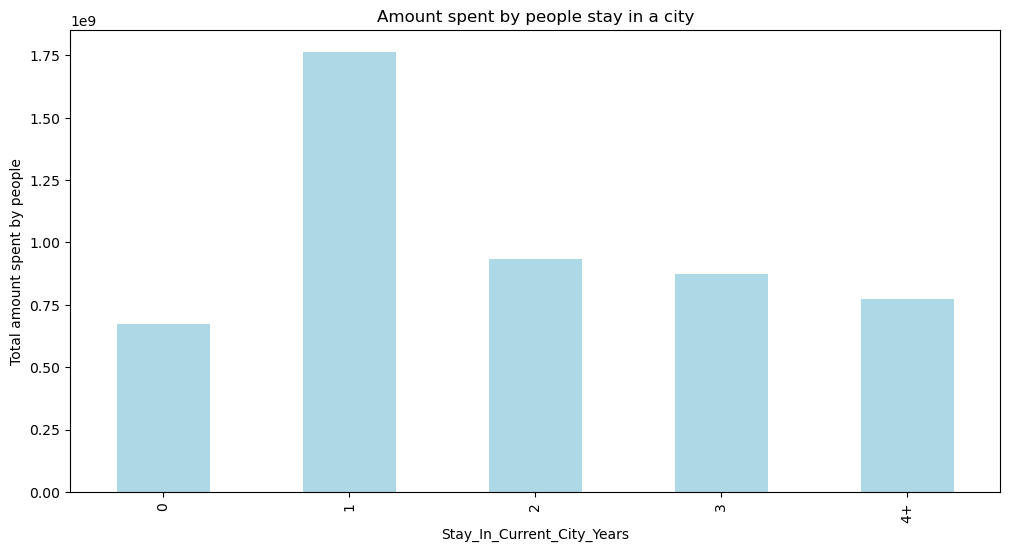

In [24]:
df.groupby("Stay_In_Current_City_Years").sum(numeric_only=True)["Purchase"].plot(kind="bar",color="lightblue",figsize=(12,6))
plt.ylabel("Total amount spent by people");
plt.title("Amount spent by people stay in a city");

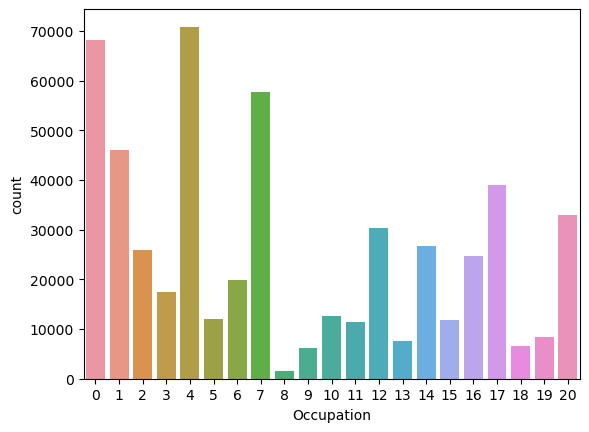

In [25]:
sns.countplot(x=df["Occupation"]);

People having the occupation as 4 have most of the expenses and then 0 . Occuptaion 8 has least of the expenses .

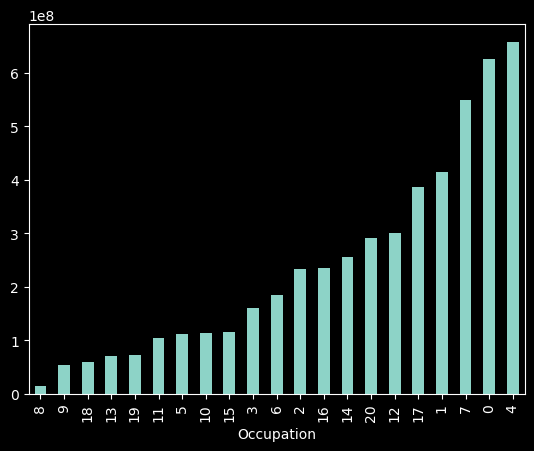

In [26]:
plt.style.use(["dark_background"])
df.groupby("Occupation").sum(numeric_only=True)["Purchase"].sort_values().plot(kind="bar");

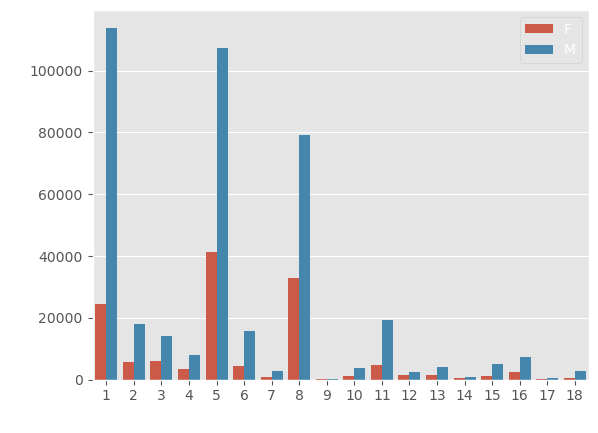

In [33]:
plt.style.use("ggplot")
sns.countplot(x="Product_Category_1",data=df,hue="Gender");
plt.legend();

In [35]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [45]:
lst = []
for i in range(len(df)):
    lst.append(df["Gender"][i]+"_"+str(df["Marital_Status"][i]))
    len(lst)

In [46]:
len(lst)

537577

In [47]:
df["MaritalStatus"] = lst

In [48]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalStatus
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalStatus', ylabel='count'>

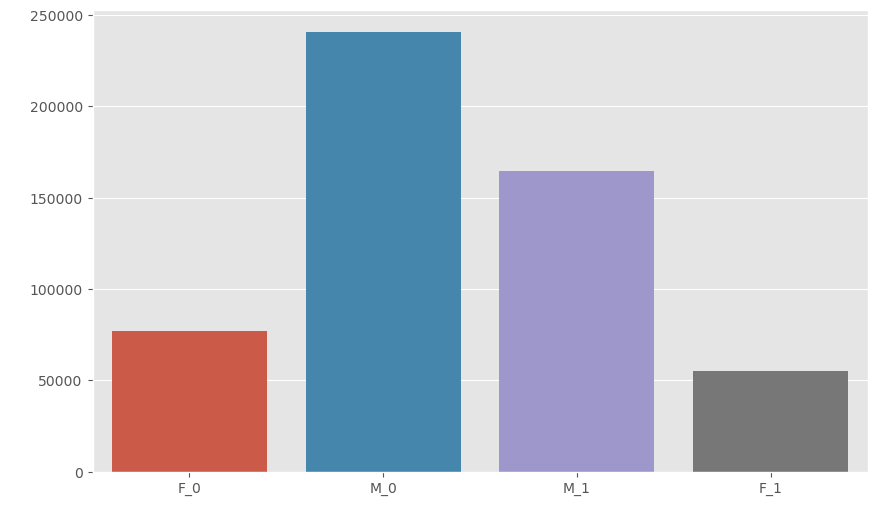

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="MaritalStatus",data=df)

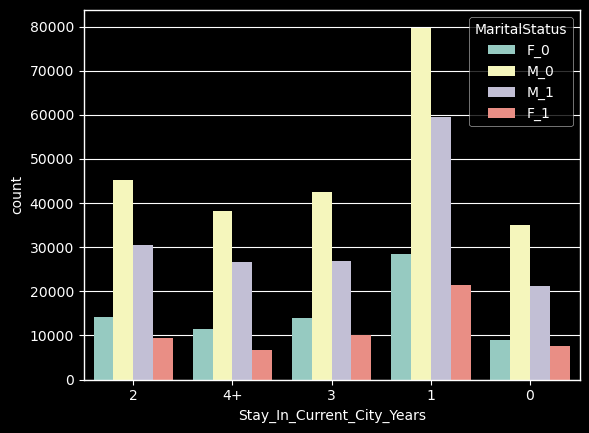

In [54]:
plt.style.use("dark_background")
sns.countplot(x="Stay_In_Current_City_Years",data=df,hue="MaritalStatus");

1. This interprets that the females that are married have less expenses.
2. Males that are unmarried and have stayed a year in a city have most of the expenses.
3. Males that are married have comparitively less expnses than married one.


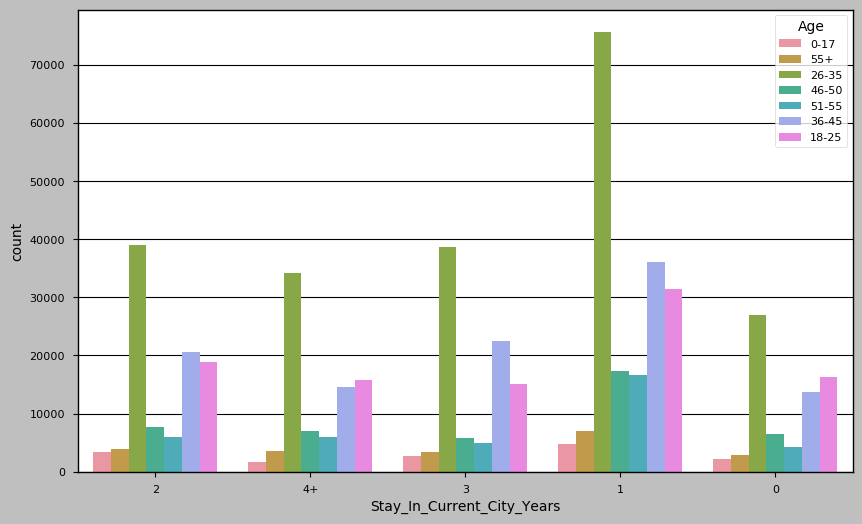

In [62]:
plt.style.use("grayscale")
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x="Stay_In_Current_City_Years",data=df,hue="Age");

In [61]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


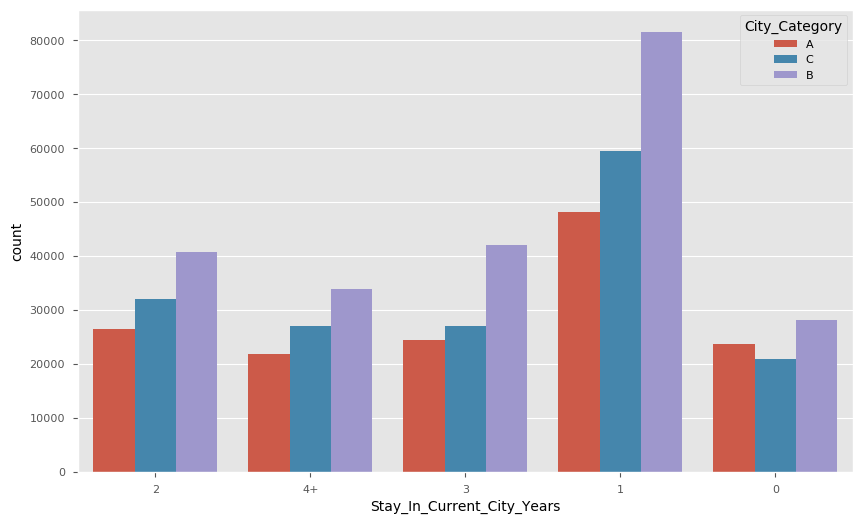

In [64]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x="Stay_In_Current_City_Years",data=df,hue="City_Category");

1. People living in city B has most of the expenses in all matter 
2. people Living in city A for 1,2,3,4+ years have least expenses.
3. People living for months or 0 year have least expenses in city C.